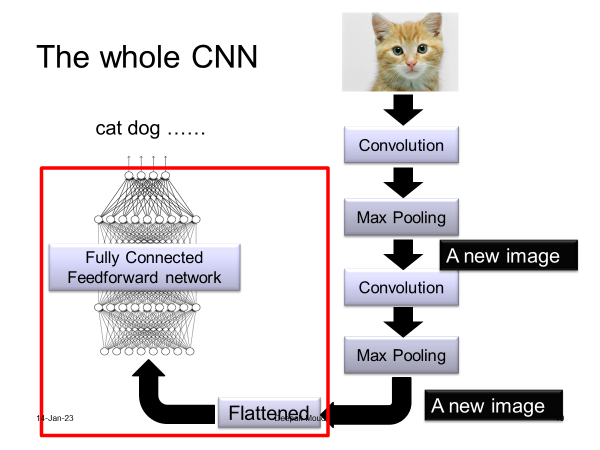

In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import tensorflow.keras

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/My Drive/MASK.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
#Import the libraries
#save dataset in google Drive
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/My Drive/MASK.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/drive/My Drive/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [5]:
len(os.listdir('/tmp/data/with_mask'))

3725

In [6]:
len(os.listdir('/tmp/data/without_mask'))

3828

In [7]:

import pandas as pd
import numpy as np
import os
import cv2



import shutil
import os
import numpy as np
import argparse
path='/tmp'
path_to_data='/tmp/data'
path_to_test_data='/tmp/test'
def get_files_from_folder(path):
  files = os.listdir(path)
  return np.asarray(files)
# get dirs
for r, d, f in os.walk(path_to_data):
  for dirs in d:
    print(dirs)


_, dirs, _ = next(os.walk(path_to_data))

# calculates how many train data per class
data_counter_per_class = np.zeros((len(dirs)))
print(len(dirs))
for i in range(len(dirs)):
  path = os.path.join(path_to_data, dirs[i])
  print(path)

  files = get_files_from_folder(path)
  print(len(files))
  data_counter_per_class[i] = len(files)
  print(data_counter_per_class[i])
  test_counter = np.round(data_counter_per_class * (1 - 0.8))
  print(test_counter)
# transfers files
for i in range(len(dirs)):
  path_to_original = os.path.join(path_to_data, dirs[i])
  path_to_save = os.path.join(path_to_test_data, dirs[i])
  print(path_to_original)
  print(path_to_save)
  if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
  files = get_files_from_folder(path_to_original)
  for j in range(int(test_counter[i])):
    dst = os.path.join(path_to_save, files[j])
    src = os.path.join(path_to_original, files[j])
    shutil.move(src, dst)

without_mask
with_mask
2
/tmp/data/without_mask
3828
3828.0
[766.   0.]
/tmp/data/with_mask
3725
3725.0
[766. 745.]
/tmp/data/without_mask
/tmp/test/without_mask
/tmp/data/with_mask
/tmp/test/with_mask


In [8]:
len(os.listdir('/tmp/data/with_mask'))

2980

In [9]:
len(os.listdir('/tmp/test/with_mask'))

745

In [10]:
len(os.listdir('/tmp/data/without_mask'))

3062

In [11]:
len(os.listdir('/tmp/test/without_mask'))

766

In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class. This class allows you to:

configure random transformations and normalization operations to be done on your image data during training
instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator.

In [12]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Example: obtaining a labeled dataset from image files on disk

Supposed you have image files sorted by class in different folders, like                                                                                                        this:
                                                  main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg



...class_b/

......b_image_1.jpg

......b_image_2.jpg

train_generator = train_datagen.flow_from_directory

(

      directory=r"./train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

The directory must be set to the path where your ‘n’ classes of folders are present.

The target_size is the size of your input images, every image will be resized to this size.

color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.

batch_size: No. of images to be yielded from the generator per batch.

class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.

shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
seed: Random seed for applying random image augmentation and shuffling the order of the image.

In [13]:
training_set = train_datagen.flow_from_directory('/tmp/data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 6042 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/tmp/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1511 images belonging to 2 classes.


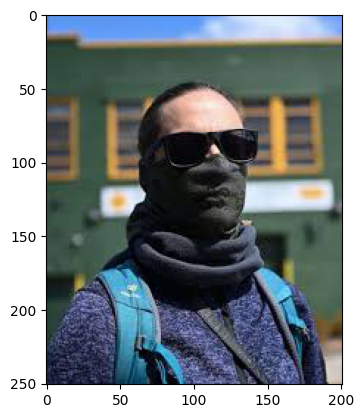

In [16]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
image = imread("/tmp/data/with_mask/with_mask_2.jpg")
	# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

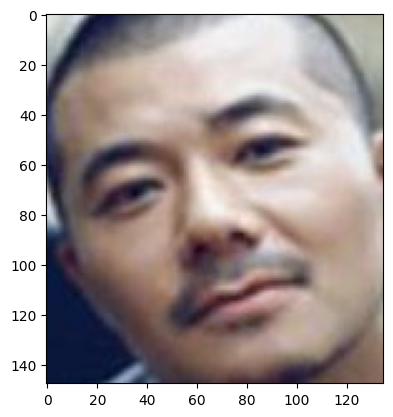

In [18]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
image = imread("/tmp/data/without_mask/without_mask_8.jpg")
	# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

In [19]:
# Initialising the CNN
classifier = Sequential()

In [20]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [21]:
# Step 3 - Flattening
classifier.add(Flatten())

In [22]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [23]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
from timeit import default_timer as timer
start = timer()




history =classifier.fit_generator(training_set,
                         epochs = 10,
                         validation_data = test_set
                         );

end = timer()
print('Training Completed!')
print("Time Elapsed in seconds",  (end - start))

<ipython-input-24-366ab13ba06f>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =classifier.fit_generator(training_set,


Epoch 1/10
102/189 [===============>..............] - ETA: 15s - loss: 0.3843 - accuracy: 0.8336

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 [==============================] - 40s 200ms/step - loss: 0.3456 - accuracy: 0.8542 - val_loss: 0.3107 - val_accuracy: 0.8829
Epoch 2/10
189/189 [==============================] - 38s 199ms/step - loss: 0.2557 - accuracy: 0.8939 - val_loss: 0.2696 - val_accuracy: 0.8928
Epoch 3/10
189/189 [==============================] - 37s 193ms/step - loss: 0.2283 - accuracy: 0.9075 - val_loss: 0.2332 - val_accuracy: 0.9021
Epoch 4/10
189/189 [==============================] - 37s 197ms/step - loss: 0.1996 - accuracy: 0.9245 - val_loss: 0.2271 - val_accuracy: 0.9206
Epoch 5/10
189/189 [==============================] - 36s 190ms/step - loss: 0.1753 - accuracy: 0.9315 - val_loss: 0.2452 - val_accuracy: 0.8968
Epoch 6/10
189/189 [==============================] - 37s 193ms/step - loss: 0.1648 - accuracy: 0.9374 - val_loss: 0.1934 - val_accuracy: 0.9305
Epoch 7/10
189/189 [==============================] - 39s 208ms/step - loss: 0.1489 - accuracy: 0.9412 - val_loss: 0.1765 - val_accuracy: 0.9

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


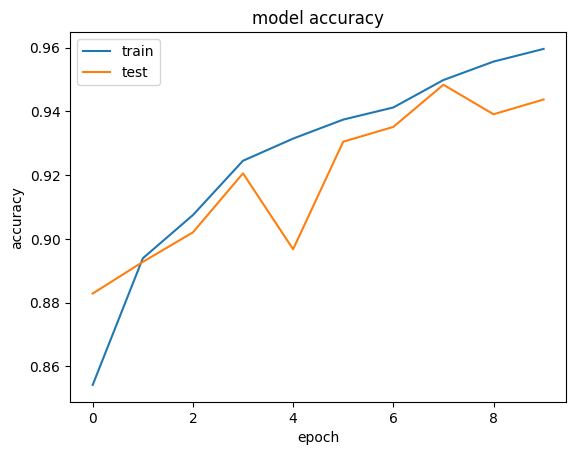

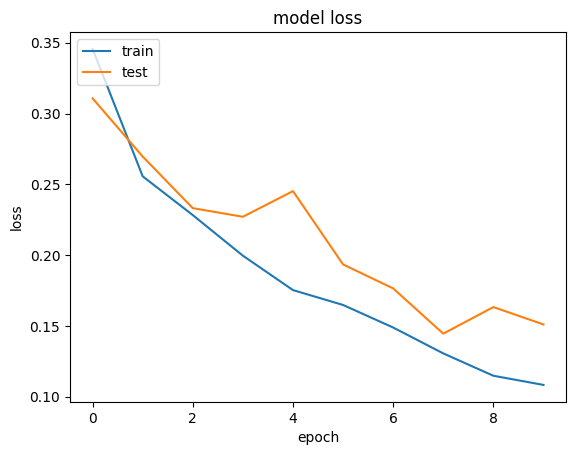

In [25]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')



plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# save model and architecture to single file
classifier.save('/content/drive/My Drive/FDPCNN1.h5')
classifier.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [29]:
# Loading saved model from Drive.
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/FDPCNN1.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)

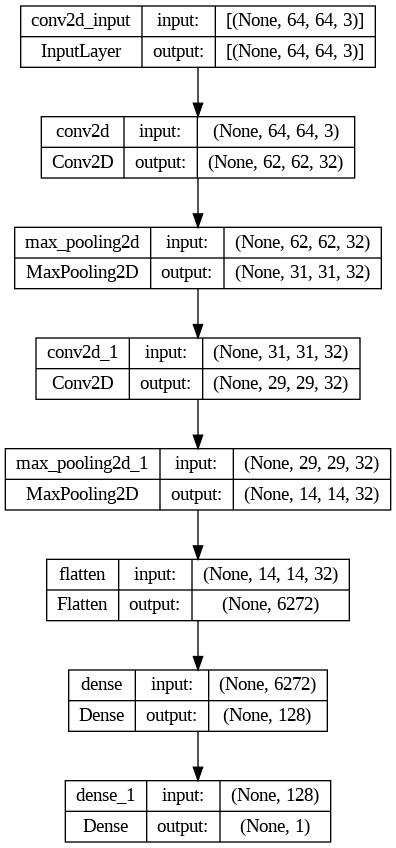

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving without_mask_225.jpeg to without_mask_225.jpeg


In [34]:
# Part 3 - Making new predictions

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('without_mask_225.jpeg', target_size = (64, 64))
test_image1 = image.img_to_array(test_image)
test_image1 = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image1)
print(result)
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'Person is without Mask'
    print(prediction)
else:
    prediction = 'Person is with mask'
    print(prediction)


1/1 [==============================] - 0s 106ms/step
[[1.]]
Person is without Mask


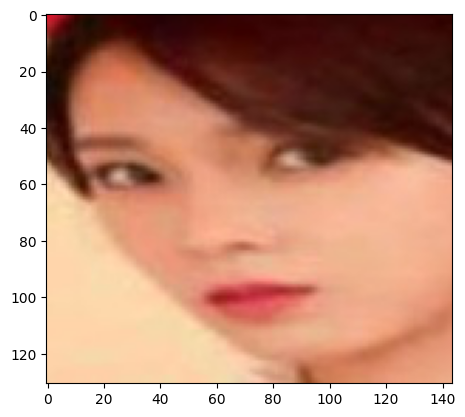

Model prediction : Person is without Mask


In [35]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread

# load image pixels
image = imread('without_mask_225.jpeg')
# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

print("Model prediction :", prediction)

In [36]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from gtts import gTTS
import IPython #IPython provides a rich architecture for interactive computing
#tts=gTTS(translation[0], lang='hi')
tts=gTTS(prediction)
tts.save('demo.wav')
sound_file='demo.wav'
IPython.display.Audio(sound_file, autoplay=True)

In [38]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/FDPCNN1.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(test_set)
print('test loss, test acc:', results)


# Evaluate on test data
22/48 [============>.................] - ETA: 3s - loss: 0.1240 - accuracy: 0.9560

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - 5s 103ms/step - loss: 0.1510 - accuracy: 0.9437
test loss, test acc: [0.151032492518425, 0.9437458515167236]


In [39]:
import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
print(ytesthat)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

<ipython-input-39-e20f96fdf66e>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


[[0.0078239 ]
 [0.9999912 ]
 [0.97797817]
 ...
 [0.8420307 ]
 [0.6728793 ]
 [0.0017465 ]]


In [40]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df


,filename,predict,y,y_pred
0,with_mask/with_mask_1.jpg,0.0,0,0
1,with_mask/with_mask_100.jpg,1.0,0,1
2,with_mask/with_mask_1000.jpg,1.0,0,1
3,with_mask/with_mask_1008.jpg,1.0,0,1
4,with_mask/with_mask_1012.jpg,1.0,0,1
...,...,...,...,...
1506,without_mask/without_mask_956.jpg,0.9,1,1
1507,without_mask/without_mask_963.jpg,0.0,1,0
1508,without_mask/without_mask_964.jpg,0.8,1,1
1509,without_mask/without_mask_974.jpg,0.7,1,1


In [41]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image : %d'%misclassified['y'].count())

Total misclassified image : 735


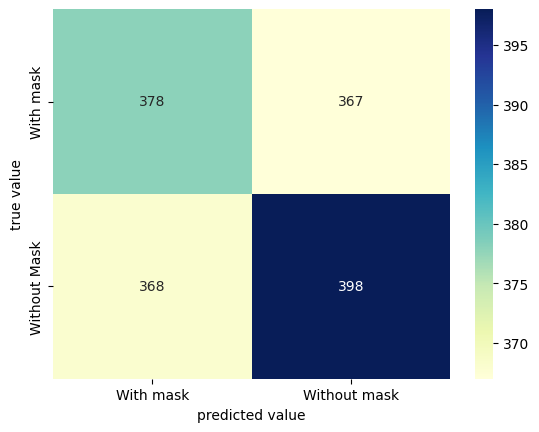

In [42]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['With mask', 'Without mask'], yticklabels=['With mask', 'Without Mask'] );
plt.xlabel('predicted value')
plt.ylabel('true value');

1/1 [==============================] - 0s 174ms/step


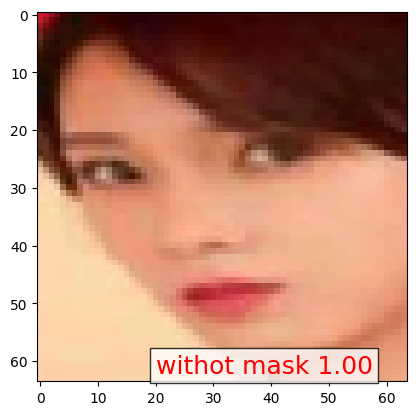

In [43]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('without_mask_225.jpeg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0 )
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='withot mask %1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='with mask :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [44]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [45]:
%%capture
# Model Accuracy
x1 = model.evaluate_generator(training_set)
x2 = model.evaluate_generator(test_set)




In [46]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.2f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.2f'%(x2[1]*100,x2[0]))

Training Accuracy  : 96.89%     Training loss  : 0.09
Validation Accuracy: 94.37%     Validation loss: 0.15


In [47]:
if x1[1]>x2[1]:
  print("Overfirring")
elif x2[1]>x1[1]:
  print("Underfitting")
else:
  print(" Model is perfect")

Overfirring


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 122.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=62c02d101c83b3b3ce7d6f754e152be3a6c28a4a9cdb4e467b85626dd1daac99
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uni

In [50]:
!pip install pyngrok==5.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19773 sha256=936ba0016043185f1b3b8dfdf065bdbdd8b340766c946c52ee0ccb2831ff0b38
  Stored in directory: /root/.cache/pip/wheels/6c/e1/46/8d60711cb43fb2e055fb69bb9964f91c9a5046f7924d2996ac
Successfully built pyngrok


In [51]:
!ngrok authtoken  2RMJSTRKaAjCjxd2WdF7P55Ab4w_7KRmmrYhYSwg4VsDh96YZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [70]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/FDPCNN1.h5')

html_temp = """
   <div class="" style="background-color:green;" >
   <div class="clearfix">
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;"> IMAGE IDENTIFIER </p></center>
   <center><p style="font-size:30px;color:white;margin-top:10px;"> Developer: Venket </p></center>
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

st.title("""
        Face Mask Detection
         """
         )
file= st.file_uploader("Please upload image", type=("jpeg", "png","jpg"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  #x = cv2.resize(image_data, (48, 48))
  #img = image.load_img(image_data, target_size=(48, 48))
  #x = image.img_to_array(img)
  size=(64, 64)
  image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img=np.asarray(image)
  img_reshape=np.expand_dims(img, axis=1)
  img_reshape=img[np.newaxis,...]
  result = model.predict(img_reshape)
  print(result)
  #training_set.class_indices
  if result[0][0] == 1:
    prediction = "Person without Mask"
    print(prediction)
  else:
    prediction = 'Person  with Mask'
    print(prediction)#x = np.expand_dims(x, axis=1)


  return prediction
if file is None:
  st.text("Please upload an Image of person ")
else:
  image=Image.open(file)
  #image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)

if st.button("Predict whether Person is with Mask or without Mask"):
  result=import_and_predict(image)
  st.success('Model has predicted the image  is  of  {}'.format(result))
if st.button("About"):
  st.header(" Venket ")
  st.subheader("Data Science Enthusiast")

html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Model Developed using CNN</p></center>
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [63]:
#!nohup streamlit run app.py &

In [71]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://dfe7-34-82-142-218.ngrok-free.app" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py


2023-06-18 04:22:52.638 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:80
  External URL: http://34.82.142.218:80

2023-06-18 04:22:55.740465: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!ngrok.kill()

https://deepakmoud-facemaskdetectioncnn-app-lil9ym.streamlit.app/

https://github.com/deepakmoud/facemaskdetectioncnn